In [1]:
import torch

In [2]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
embed_dim = 4
sequence_length = len(alphabet)

# Sinusoidal Positional Encoding
We want to find a way to represent the position of words in a setence. We can use the following equations to get positional encodings (PE):

$PE(pos, 2i) = sin(\frac{pos}{10000 ^ {2i / d_{\text{model}}}})$ 


$PE(pos, 2i+1) = cos(\frac{pos}{10000 ^ {2i / d_{\text{model}}}})$


Here, pos is the position of the word in the sentence, d_model is the dimension of the embedding vector. i gives us the index of the dimension in the embedding vector.


Notice here that there are two indices for i in the equation. 2i and 2i + 1. This means for each i, we have two dimensions in the embedding vector. One dimension uses the sine function (2i), and the other dimension uses the cosine function (2i + 1).


For example, if the embedding dimension is 16,  then for word at position 0, 2, 4, 6, 8, 10, 12, 14, we will use the sine function, and for position 1, 3, 5, 7, 9, 11, 13, 15, we will use the cosine function. These are given by i = 0, 1, 2, 3, 4, 5, 6, 7 respectively.

In [72]:
import numpy as np
def positional_encoding(pos, d_model):
    PE = np.zeros(d_model) # for each characters, we have 16 digits to represent that character
    for i in range(d_model // 2):
        denominator = 10000 ** (2 * i / d_model)
        PE[2 * i] = np.sin(pos / denominator)
        PE[2 * i + 1] = np.cos(pos / denominator)
    return PE

for pos in range(sequence_length):
    print(f'Encoding for {alphabet[pos]} is: {positional_encoding(pos, embed_dim)}')

Encoding for a is: [0. 1. 0. 1.]
Encoding for b is: [0.84147098 0.54030231 0.00999983 0.99995   ]
Encoding for c is: [ 0.90929743 -0.41614684  0.01999867  0.99980001]
Encoding for d is: [ 0.14112001 -0.9899925   0.0299955   0.99955003]
Encoding for e is: [-0.7568025  -0.65364362  0.03998933  0.99920011]
Encoding for f is: [-0.95892427  0.28366219  0.04997917  0.99875026]
Encoding for g is: [-0.2794155   0.96017029  0.05996401  0.99820054]
Encoding for h is: [0.6569866  0.75390225 0.06994285 0.997551  ]
Encoding for i is: [ 0.98935825 -0.14550003  0.07991469  0.99680171]
Encoding for j is: [ 0.41211849 -0.91113026  0.08987855  0.99595273]
Encoding for k is: [-0.54402111 -0.83907153  0.09983342  0.99500417]
Encoding for l is: [-0.99999021  0.0044257   0.1097783   0.9939561 ]
Encoding for m is: [-0.53657292  0.84385396  0.11971221  0.99280864]
Encoding for n is: [0.42016704 0.90744678 0.12963414 0.99156189]
Encoding for o is: [0.99060736 0.13673722 0.13954311 0.990216  ]
Encoding for p is

In [73]:
T = 9
ts = torch.arange(0, T)
time_embed_dim = 100
time_embeddings = torch.zeros(T, time_embed_dim)
for t in ts:
    time_embeddings[t] = torch.tensor(positional_encoding(t, time_embed_dim))

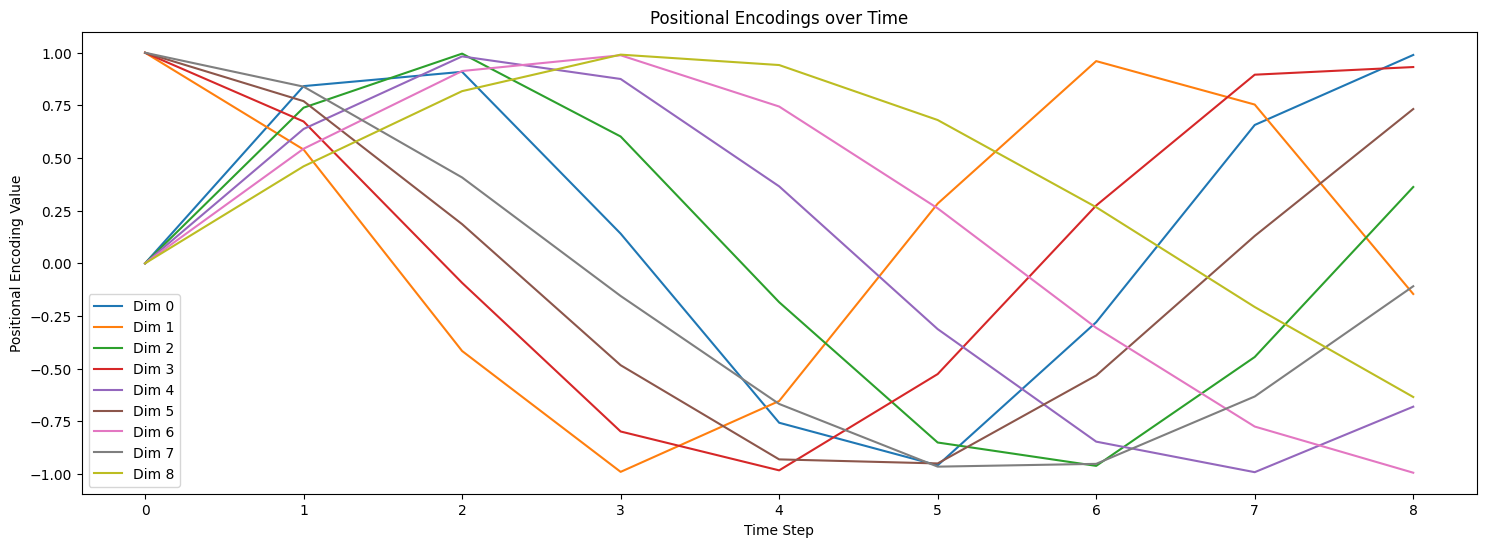

In [74]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)

for i in range(0, time_embed_dim):
    ax.plot(time_embeddings[:, i], label=f'Dim {i}')
    if i == 8:
        break

ax.set_title('Positional Encodings over Time')
ax.set_xlabel('Time Step')
ax.set_ylabel('Positional Encoding Value')
ax.legend()

## A mathematically stable implementation
Above, we're doing $10000 ** (2 * i / d_{model})$ to compute the denominator. This can numerically underflow if $2 * i / d_{model}$ is large. Also, it requires division, and for gradient flow, we tend to avoid division. Therefore, we can use exponential and log to do the trick.  

In [ ]:
def get_positional_encoding(sequence_length, d_model):
    pos_encoding = torch.zeros(sequence_length, d_model)
    position = torch.arange(sequence_length).reshape(-1, 1)
    div = torch.exp(torch.arange(0, d_model, 2) * -1 * torch.log(torch.tensor(10000.0)) / d_model)
    pos_encoding[:, 0::2] = torch.sin(position * div)
    pos_encoding[:, 1::2] = torch.cos(position * div)
    return pos_encoding

print(get_positional_encoding(sequence_length, embed_dim))

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0100,  0.9999],
        [ 0.9093, -0.4161,  0.0200,  0.9998],
        [ 0.1411, -0.9900,  0.0300,  0.9996],
        [-0.7568, -0.6536,  0.0400,  0.9992],
        [-0.9589,  0.2837,  0.0500,  0.9988],
        [-0.2794,  0.9602,  0.0600,  0.9982],
        [ 0.6570,  0.7539,  0.0699,  0.9976],
        [ 0.9894, -0.1455,  0.0799,  0.9968],
        [ 0.4121, -0.9111,  0.0899,  0.9960],
        [-0.5440, -0.8391,  0.0998,  0.9950],
        [-1.0000,  0.0044,  0.1098,  0.9940],
        [-0.5366,  0.8439,  0.1197,  0.9928],
        [ 0.4202,  0.9074,  0.1296,  0.9916],
        [ 0.9906,  0.1367,  0.1395,  0.9902],
        [ 0.6503, -0.7597,  0.1494,  0.9888],
        [-0.2879, -0.9577,  0.1593,  0.9872],
        [-0.9614, -0.2752,  0.1692,  0.9856],
        [-0.7510,  0.6603,  0.1790,  0.9838],
        [ 0.1499,  0.9887,  0.1889,  0.9820],
        [ 0.9129,  0.4081,  0.1987,  0.9801],
        [ 0.8367, -0.5477,  0.2085

In [67]:
T = 9
ts = torch.arange(0, T)
time_embed_dim = 100

time_embeddings = get_positional_encoding(T, time_embed_dim)

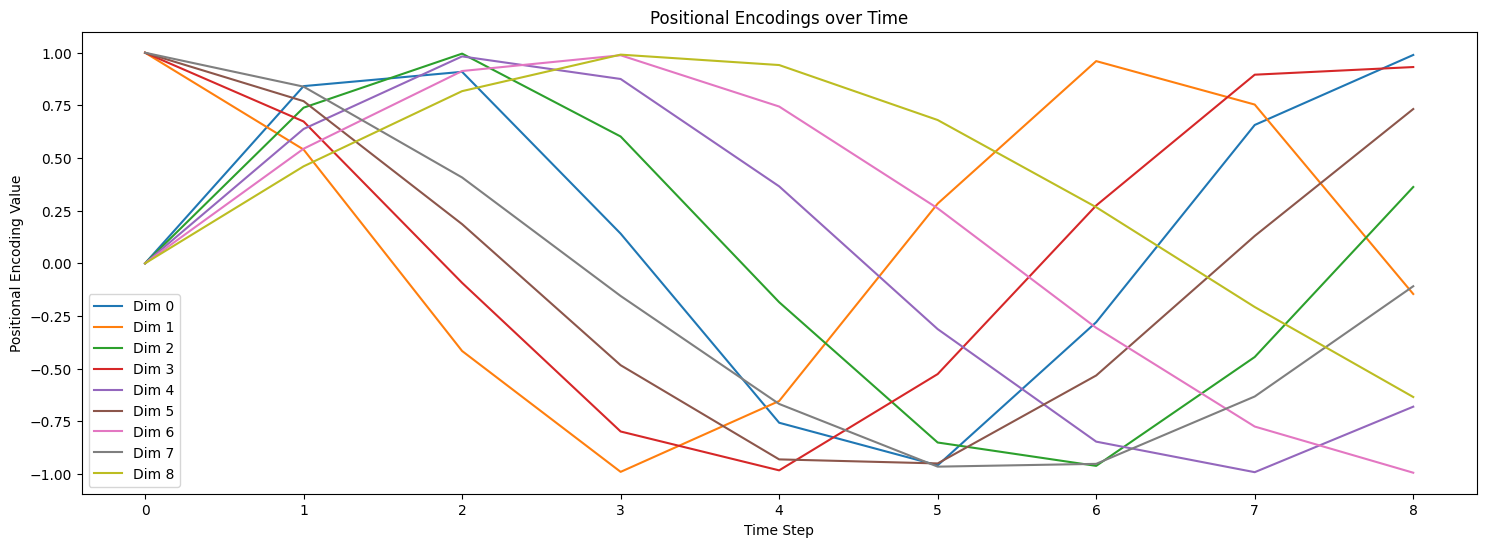

In [68]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)

for i in range(0, time_embed_dim):
    ax.plot(time_embeddings[:, i], label=f'Dim {i}')
    if i == 8:
        break

ax.set_title('Positional Encodings over Time')
ax.set_xlabel('Time Step')
ax.set_ylabel('Positional Encoding Value')
ax.legend()

In [75]:
'''Designed for diffusion models'''
def get_timestep_encoding(t, d_model):
    '''
    t: (b,)
    d_model: int
    return: (b, d_model)
    '''
    device = t.device
    half_dim = d_model // 2
    emb = torch.exp(
        torch.arange(0, half_dim, device=device) *
        -1 * torch.log(torch.tensor(10000.0, device=device))  / half_dim)
    emb = t[:, None] * emb[None, :]  # (b, 1) * (1, half_dim) -> (b, half_dim)
    emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=-1) # (b, d_model)

    if d_model % 2 == 1:  # zero pad
        emb = torch.nn.functional.pad(emb, (0, 1))
    return emb

In [82]:
T = 9
ts = torch.arange(0, T)
time_embed_dim = 16

time_embeddings = get_timestep_encoding(ts, time_embed_dim)

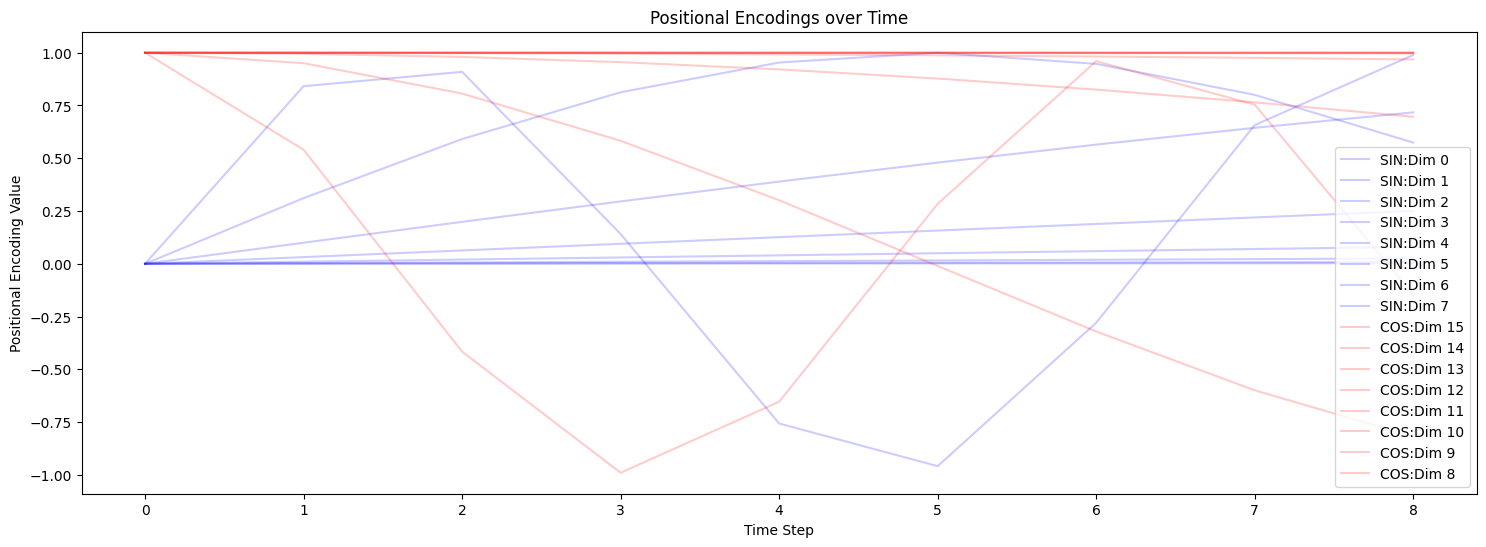

In [90]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)

for i in range(0, time_embed_dim):
    if i == 8:
        break
    ax.plot(time_embeddings[:, i], color='blue', alpha=0.2, label=f'SIN:Dim {i}')

for i in reversed(range(0, time_embed_dim)):
    if i == 7:
        break
    ax.plot(time_embeddings[:, i], color='red', alpha=0.2, label=f'COS:Dim {i}')

ax.set_title('Positional Encodings over Time')
ax.set_xlabel('Time Step')
ax.set_ylabel('Positional Encoding Value')
ax.legend()